# Setup

#### Importacion de librerias

In [2]:
# Uso General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Metricas y utilidades
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state


# Modelos
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#### Importacion de datos

In [3]:
# Lectura de csv y creacion de dataframe
data = pd.read_csv("data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Analisis de los datos
Antes de comezar a trabajar, primero hay que evaluar la integridad de los datos

Usando la funcion "*.info()*" podemos encontrar un resumen de los datos a tratar. Lo que mas nos interesa es descubrir si existn valores nulos. En nuestro caso la columna RM tiene 5 valores nulos los cuales trataremos mas adelante.Usando la funcion ".info()" podemos encontrar un resumen de los datos a tratar. 

Lo que mas nos interesa es descubrir si existn valores nulos. En nuestro caso la columna RM tiene 5 valores nulos los cuales trataremos mas adelante.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


Usando la funcion "*.describe()*" obtenemos una tabla con informacion mas detallada sobre cada columna del dataframe, dicha informacion es:

* **count:** El numero de valores no nulos
* **mean:** La media de la columna
* **std:** La desviacion estandar de la columna
* **min:** El menor valor de la columna
* **25%:** El percentil al 25%
* **50%:** El percentil al 50%
* **75%:** El percentil al 75%
* **max:** El mayor valor de la columna

El metodo "*.T*" nos da el formato de tabla con las variables anteriores arriba.

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000
PTRATIO,511.0,18.500000,2.200348,12.60000,17.400000,19.10000,20.200000,23.0000


Usando la funcion "*.hist()*" creamos una seria de histogramas que nos ayudan a ver la distribucion de valores por columna.

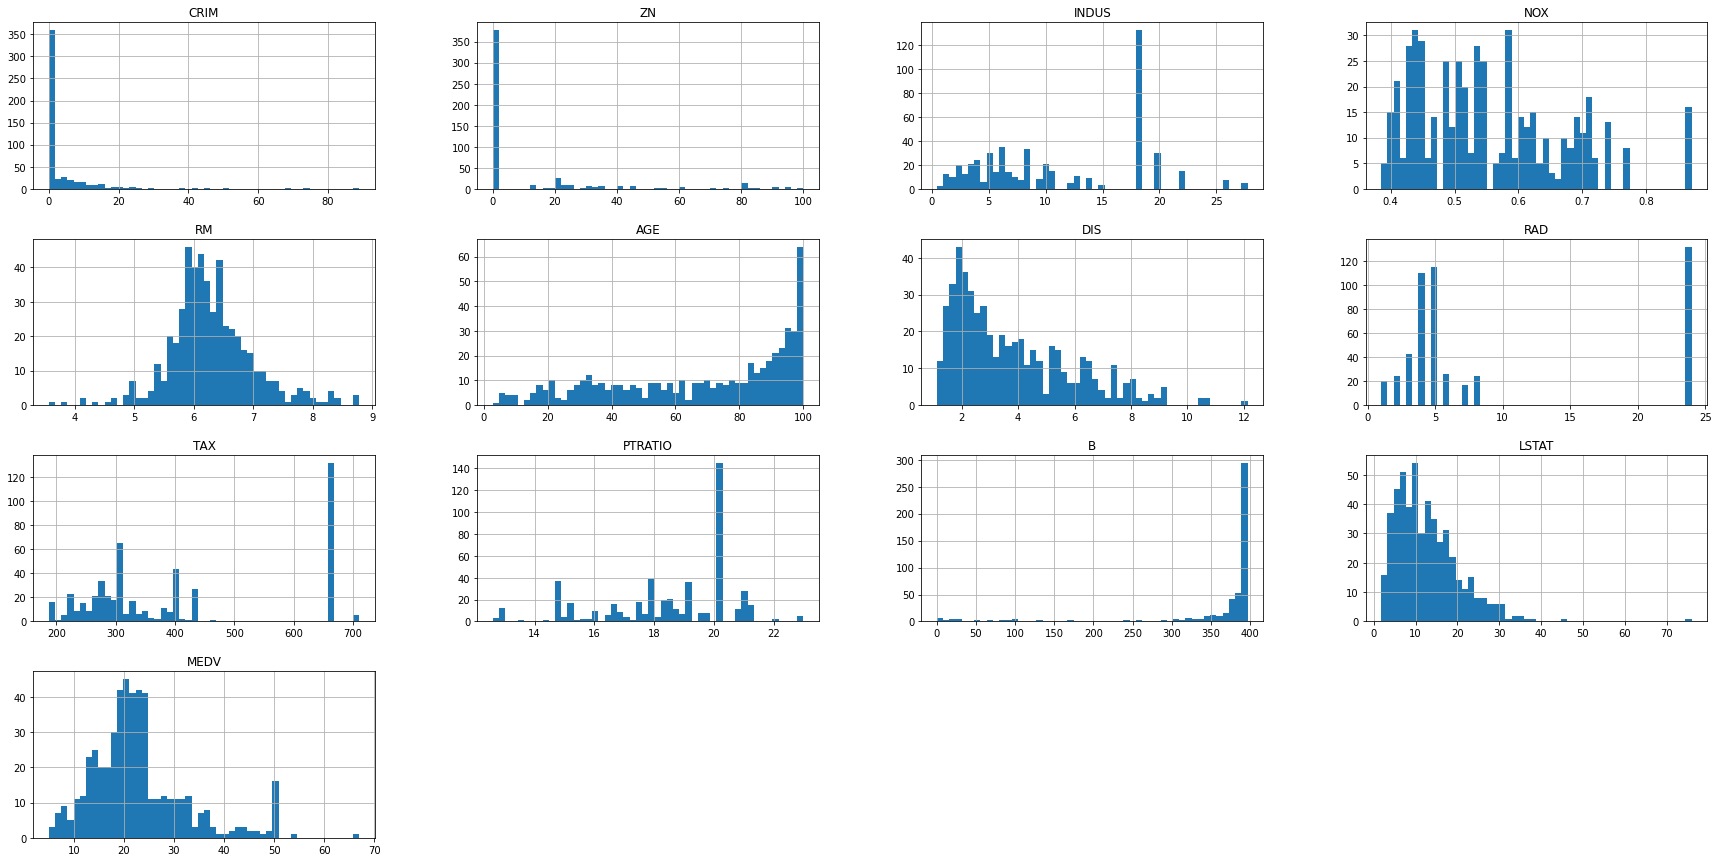

In [24]:
data.hist(bins=50, figsize=(30, 15))
plt.show()

Usando la funcion "*.corr()*" podemos obtener la correlacion que existen entre todas contra todas las columnas, pero solo nos importa descubrir la correlacion entre nuesra variable dependiente la cual es **CRIM**.

In [27]:
corr_matrix = data.corr()
corr_matrix['CRIM'].sort_values(ascending=False)

CRIM       1.000000
RAD        0.625964
TAX        0.583389
NOX        0.420524
INDUS      0.405524
LSTAT      0.405030
AGE        0.350847
PTRATIO    0.276695
ZN        -0.198451
RM        -0.220363
DIS       -0.377028
MEDV      -0.380072
B         -0.384356
Name: CRIM, dtype: float64

Usando la funcion *".plotting.scatter_matrix()*" podemos obtener una matriz que nos ayudara a visualizar las correlaciones de las columnas mas significativas.

En la matriz se pueden observar dos tipos da graficas. Los histogramas nos muestran la distrubucion de los valores de la columna mientras que los graficos de dispersion nos muestran de forma visual las correlaciones de las variables que se intersectan en la matriz.

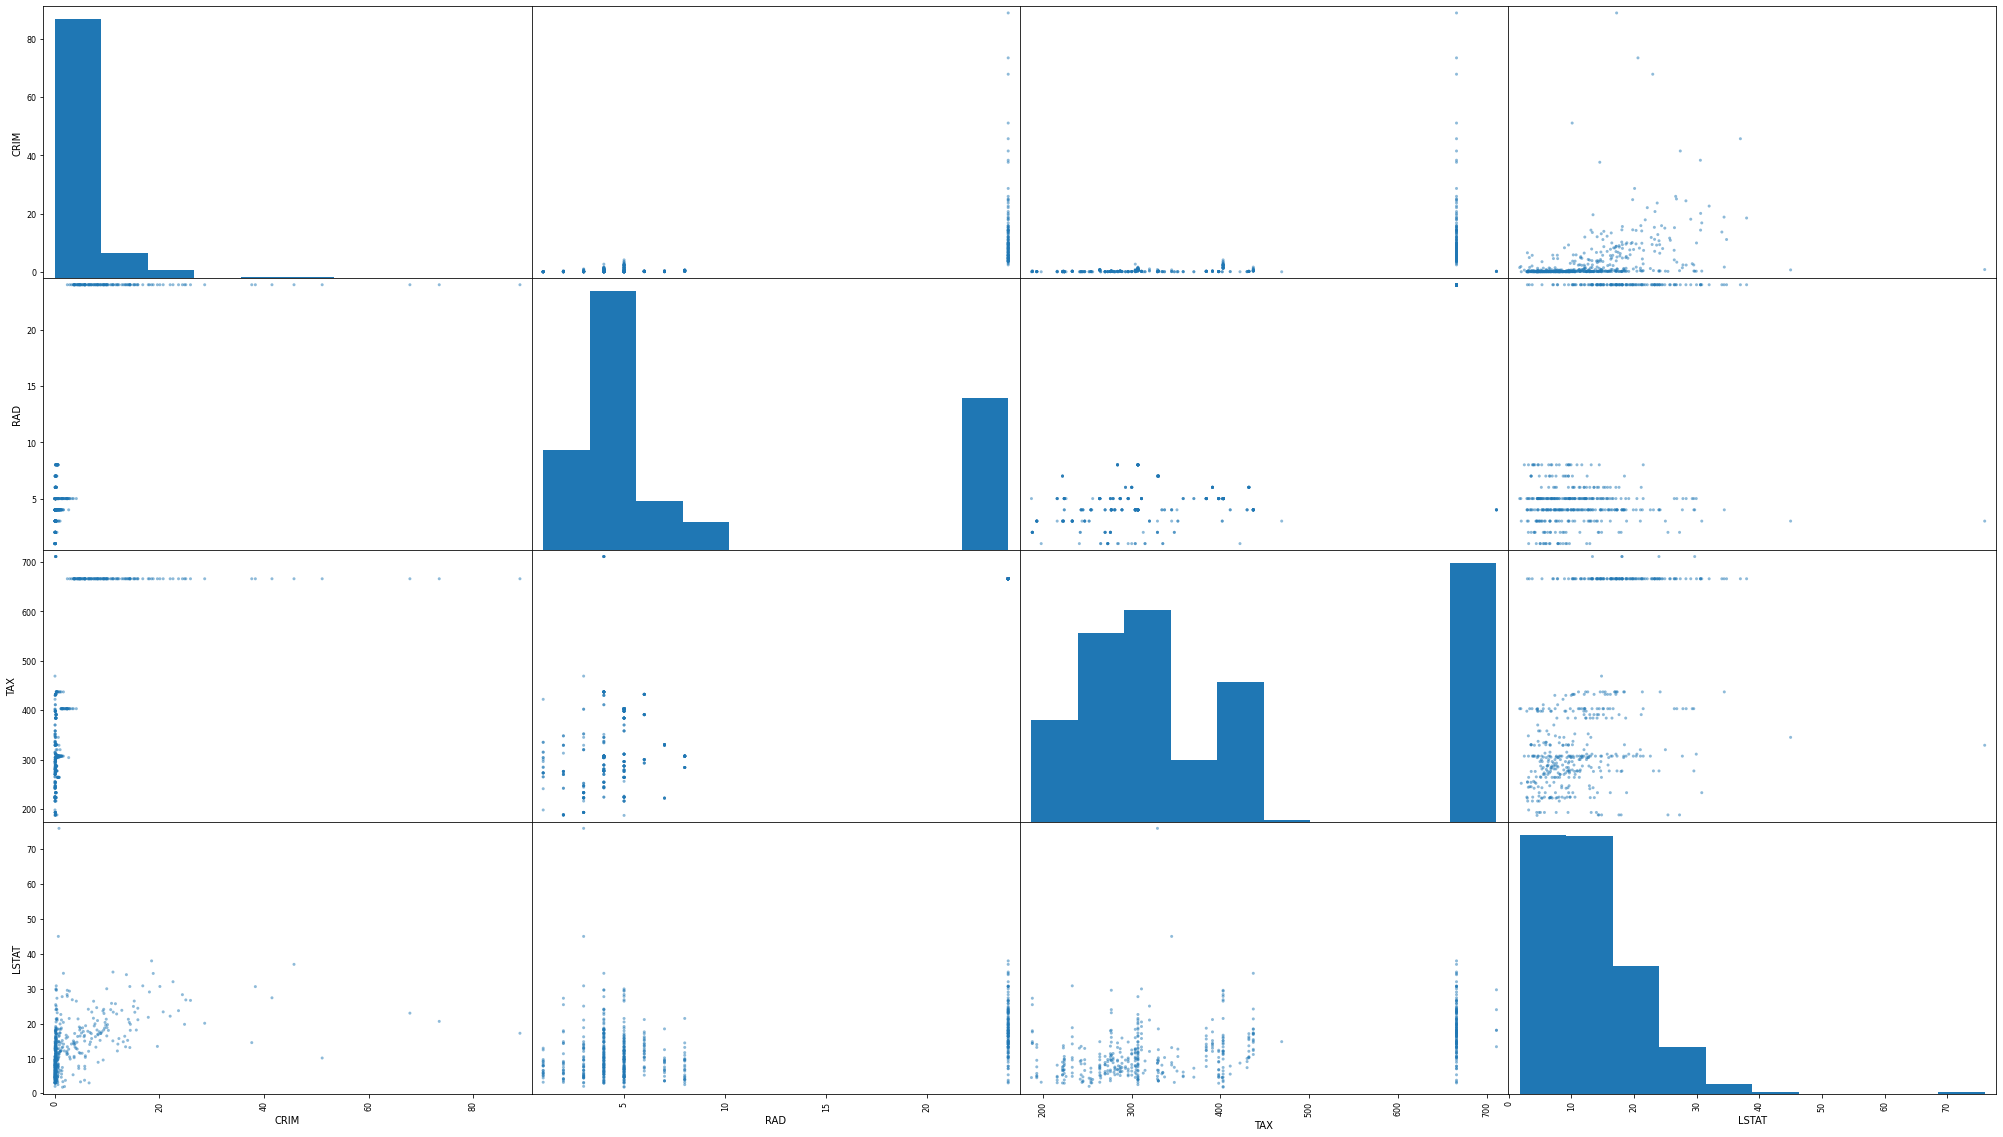

In [8]:
att = ["CRIM", "RAD", "TAX", "LSTAT"]
pd.plotting.scatter_matrix(data[att], figsize=(35, 20));

# Preparacion de los datos

Para comenzar quitamos la columna de **CHAS** de nuestro data frame ya que es una variable "*dummy*" que no necsitamos para nuestro analisis.

In [9]:
data.drop(["CHAS"], axis=1, inplace=True)

## Eliminacion de outliers

Lo siguiente es eliminar lo outliers de nuestro data set ya que esos datos peden provocar confusion cuando entrenemos al modelo. Para hacer esto encontramos los valores que no esten dentro del rango de los cuantiles de 25% y 75%, almacenamos en una variable llamada "*out_num*" el numero de outliers encontrados y utilizamos ese numero para encontrar el radio entre outliers y valores.

In [10]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
ri = q3-q1
min_ = q1 - 3 * ri
max_ = q3 + 3 * ri
out_num = data[(data < min_)  | (data > max_)].count()
out_ratio = out_num/data.count()

outliers_i = pd.concat([out_num, out_ratio], axis=1)
outliers_i.columns = ['Count', 'Ratio']
outliers_i


,Count,Ratio
CRIM,34,0.066536
ZN,45,0.088063
INDUS,0,0.000000
NOX,0,0.000000
RM,1,0.001976
AGE,0,0.000000
DIS,0,0.000000
RAD,0,0.000000
TAX,0,0.000000
PTRATIO,0,0.000000


Con los outliers encontrados, los dejamos de lado y utilizaremos un dataframe limpio llamado "*data_no_outliers*".

In [11]:
data_no_outliers = data[~((data < min_)  | (data > max_)).any(axis=1)]
data_no_outliers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 510
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     371 non-null    float64
 1   ZN       371 non-null    float64
 2   INDUS    371 non-null    float64
 3   NOX      371 non-null    float64
 4   RM       366 non-null    float64
 5   AGE      371 non-null    float64
 6   DIS      371 non-null    float64
 7   RAD      371 non-null    int64  
 8   TAX      371 non-null    int64  
 9   PTRATIO  371 non-null    float64
 10  B        371 non-null    float64
 11  LSTAT    371 non-null    float64
 12  MEDV     371 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.6 KB


## Llenado de valores nulos
En este caso, tenemos solo 5 valores nulos en la columna de LM
por lo que los llenaremos usando la mediana de la columna

In [12]:
data_no_outliers = data_no_outliers.fillna(data_no_outliers.median())

## Finalmente se escalan los datos

Finalemnte para comezar a entrar un modelo dividimos nuestro dataframe en **X**, siendo las variables independientes, y **Y**, siendo la variable dependiente. Dividimos el dataframe en uno de practica y otro de pruebas y utilizando "*StandardScaler()*" conseguimos nuestros valores para comenzar el entrenamiento.

In [13]:
scaler = StandardScaler()

X = data_no_outliers.drop(columns=["CRIM"], axis=1)
y = data_no_outliers.CRIM.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seleccion del modelo a utilizarse

## Test General
Se probaran varios modelosde regresion para determinar cual funcionara mejor para este caso. Los modelos se entrenaran mediante un *for* que regresara la R^2 y RMSE de cada modelo.

In [14]:
models = [
      ('Sklearn Linear Regression', LinearRegression()),
      ('XGBoost Regressor', XGBRegressor(random_state=42)),
      ('Sklearn Random Forest Regressor', RandomForestRegressor(random_state=42)),
      ("Sklearn Decision Tree Regressor", DecisionTreeRegressor(random_state=42))
]
results = []

for model in models:
      # Se entrena el modelo
      model[1].fit(X_train, y_train)
      # Se predice con el df de test
      y_pred = model[1].predict(X_test)
      # Se guardan los resultados
      print(model[1].score(X_test, y_test))
      results.append([model[0], r2_score(y_pred, y_test), np.sqrt(mean_squared_error(y_test, y_pred))])

pd.DataFrame(data=results, columns=["Modelo", "R^2", "RMSE"]).sort_values("RMSE", ascending=True).reset_index(drop=True)



0.7996691936236145
0.8146623093004551
0.8751514287738855
0.8793780834304332


,Modelo,R^2,RMSE
0,Sklearn Decision Tree Regressor,0.875171,0.982937
1,Sklearn Random Forest Regressor,0.833971,1.000010
2,XGBoost Regressor,0.756848,1.218413
3,Sklearn Linear Regression,0.736179,1.266737


Como se pudo observar anteriormente, el modelo de Sklearn, Decision Tree Regressor es el modelo con
mejores resultados a simple vista, sin modificar ninguno de sus parametros

### Analisis de Decision Tree
Ya que este tuvo los mejores resultados, vamos a intentar mejorar los resultados modificando sus parametros. Para esto generaremos una gran numero de semillas para el modelo y asi poder encontrar los mejores parametros para el modelo. 

In [15]:
dtr = DecisionTreeRegressor()

params = {
      "random_state": list(range(1,10000))
}

clf = GridSearchCV(
      estimator=dtr,
      param_grid=params
)

# clf.fit(X_train, y_train)
# print(clf.best_params_)

dtr1 = DecisionTreeRegressor(random_state=7325)
dtr1.fit(X_train, y_train)
y_pred = dtr1.predict(X_test)
print(dtr1.score(X_test,y_test))



0.8998985264100431


### Anotaciones
Se opto por este metodo de busqueda de parametros ya que se experimento por cambiar los parametros del modelo pero nunca se logro encontrar uno que superara a el resultado del modelo con parametos estadar y un *random_state* de 42. Asi que utilizando los parametros por defecto del modelo de *DecisionTreeRegressor* se busco el *random_state* con el mejor resultado posible.

**Score Final (R^2)**: 0.8998985264100431
